In [ ]:
# Лабораторная работа №1
# Иерархический анализ данных
# Данные взяты из файла Econom_Cities_data

In [154]:
#  Активируем библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
#  Активируем 3 процедуры иерархического кластерного анализа
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

matplotlib.style.use('ggplot')
%matplotlib inline


import os

In [155]:
#  Задаем рабочую папку
os.chdir("/content/drive/MyDrive/ITMO/data analysis/dz_1")

In [156]:
#  Указываем колонку City как index_col
df = pd.read_csv('/content/drive/MyDrive/ITMO/data analysis/dz_1/Econom_Cities_data.csv', sep = ';', decimal=',',  index_col='City')

In [157]:
df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [158]:
df

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


In [159]:
# Данные находятся в разных диапазонах. Нужна нормализация
# z = (x - mean) / std - формула нормализации

In [160]:
stand_1 = preprocessing.StandardScaler() # Создаем объект scaler
stand_1.fit(df) # Изучаем данные (вычисляем среднее и std)
X = stand_1.transform(df)  # Применяем преобразование
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [161]:
X

,Work,Price,Salary
City,,,
Amsterdam,0.138269,-0.151250,0.213212
Athens,0.171046,-0.698647,0.203941
Bogota,0.322325,-1.436242,0.194519
Bombay,0.280303,-1.788804,0.191429
Brussels,0.135748,0.229145,0.213960
Buenos_Aires,0.246266,-0.591951,0.195018
Cairo,-4.783750,-1.473354,-4.795489
Caracas,0.275681,-0.364642,0.194220
Chicago,0.226515,0.233784,0.219643


In [162]:
# Для проведения иерархического кластерного анализа используем команду linkage из библиотеки scipy

In [163]:
# Кластеризуем
# Кластеризация методом Уорда: создаем компактные, сбалансированные кластеры
# на основе евклидова расстояния
link = linkage(X, 'ward', 'euclidean')

In [164]:
# В объекте link хранится история объединения кластеров. Это матрица numpy (n-1) x 4
# где n -- число наблюдений
# Каждая строка матрицы описывает слияние очередной пары кластеров с номерами link[i, 0] и link[i, 1].
# Новому кластеру присваивается номер n + i
# Столбец link[i, 2] содержит расстояние между объединяемыми кластерами
# а link[i, 3] -- объем нового кластера.

In [165]:
print(link.shape)

(47, 4)


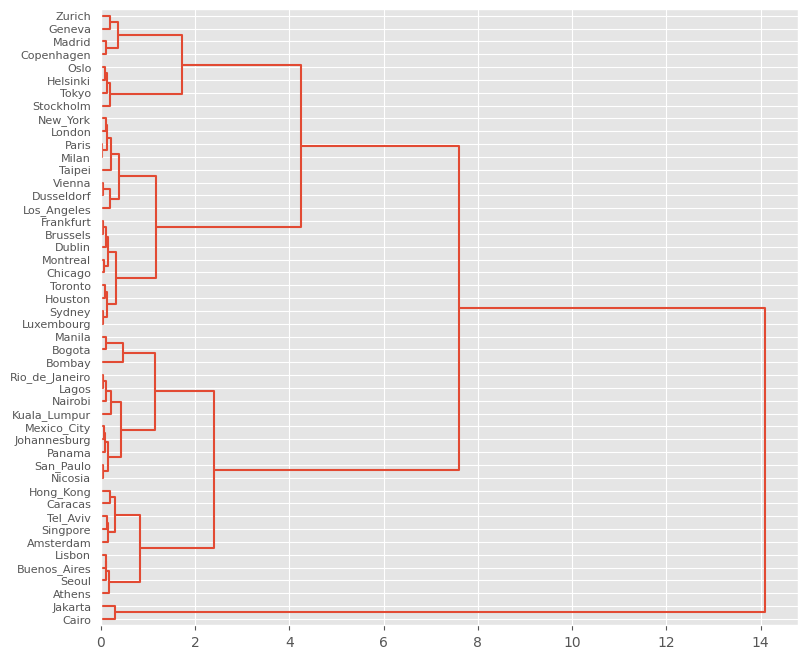

In [166]:
# Построим дендрограмму
# Пороговое значение определяется по формуле h = 0.7*max(link[:,2])

fig = plt.figure(figsize=(9,8))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=df.index.tolist(),
                # опция для более красивого отображения слишком ветвистой дендрограммы
                truncate_mode=None,
                # повернуть подписи вертикально
                color_threshold=-1,
                orientation = "right",
                leaf_rotation=0.)

In [167]:
# Видно, что значения у Jacarta и Cairo являются выбросом. Удалим их

In [168]:
print(df[df.index=='Cairo'])
print(df[df.index=='Jakarta'])

df1 = df.drop('Jakarta');
df1 = df1.drop('Cairo');

       Work  Price  Salary
City                      
Cairo -9999   37.1 -9999.0
         Work  Price  Salary
City                        
Jakarta -9999   43.6 -9999.0


In [169]:
# Построем дендрограмму еще раз

In [170]:
stand = preprocessing.StandardScaler()
stand.fit(df1)
X2 = stand.transform(df1)
X2 = pd.DataFrame(X2, index=df1.index, columns=df1.columns)

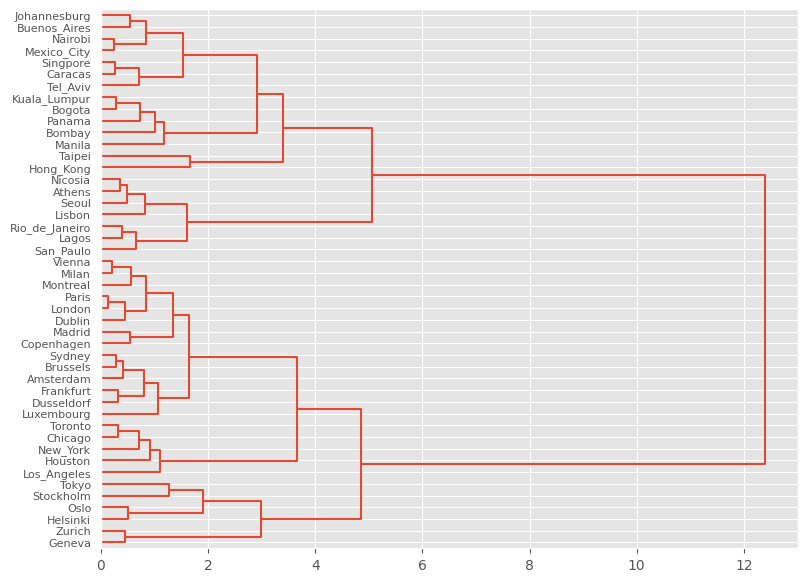

In [171]:
link = linkage(X2, 'ward', 'euclidean')

fig = plt.figure(figsize=(9,7))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=df1.index.tolist(),
                # опция для более красивого отображения слишком ветвистой дендрограммы
                truncate_mode=None,
                # повернуть подписи вертикально
                color_threshold=-1,
                orientation = "right",
                leaf_rotation=0.)

In [172]:
# Каменистая осыпь, она же локоть - график, помогающий определить число кластеров
# Будем использовать второй столбец матрицы link где хранятся расстояния между объединяемыми кластерами.

In [173]:
dist = link[:, 2]
dist

array([ 0.13000932,  0.20992596,  0.24101549,  0.26638013,  0.27962161,
        0.28619313,  0.31145704,  0.31305006,  0.3489377 ,  0.38756772,
        0.419298  ,  0.44645167,  0.45306282,  0.4905399 ,  0.50930475,
        0.54142314,  0.54694673,  0.55560294,  0.6525312 ,  0.70695573,
        0.71322146,  0.73106836,  0.80923253,  0.81996004,  0.83440954,
        0.83591396,  0.92010068,  1.00797757,  1.07317494,  1.09798639,
        1.18557963,  1.2661125 ,  1.34552527,  1.5346713 ,  1.60218207,
        1.65009621,  1.67120837,  1.9067302 ,  2.91093293,  2.99369803,
        3.40166518,  3.65965497,  4.85967779,  5.06109685, 12.40027153])

In [174]:
# На графике "Каменистая осыпь" показывается зависимость расстояний между кластерами от шага объединения (обратного)
# На графике находим момент, начиная с которого расстояние перестанет значительно меняться

Text(0, 0.5, 'Расстояние')

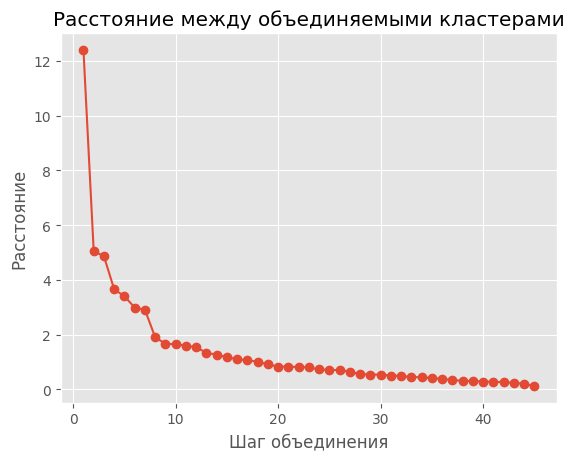

In [175]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

In [176]:
# Из графика видно, что если мы остановим объединение кластеров при расстоянии равном примерно 4,
# мы получим 3 локтя, или 4 кластера

In [177]:
# Переходим к интерпретации кластеров

In [178]:
#  Добавляем столбец cluster к таблице данных
df1['cluster'] = fcluster(link, 4, criterion='maxclust')

In [179]:
#  Средние значения в каждом кластере
df1.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1792.000000,77.526316,55.157895
3,1798.857143,50.942857,19.214286
4,2082.357143,53.121429,14.914286


In [180]:
# В первых трех кластерах хорошие отличия просматриваются в Price и Salary
# В первом кластере высокая зарплата. В кластере 4 много рабочих часов, но низкие зарплаты.

In [181]:
# Попробуем добавить 5 кластер

In [182]:
df1['cluster'] = fcluster(link, 5, criterion='maxclust')
df1.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1960.000000,75.820000,59.480000
3,1732.000000,78.135714,53.614286
4,1798.857143,50.942857,19.214286
5,2082.357143,53.121429,14.914286


In [183]:
# добавился новый "средний" кластер

In [184]:
# Вывод: Все зависит от решаемых задач и нужного сегмента. Можно разбить на большее число кластеров, в случае необходимости.